voy a hacer el ej 4 de practicos de cs de datos

cargo la tabla, me abre su pagina, copio el link 

In [95]:
#descargo bibliotecas clave
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
from scipy import stats

In [96]:
#cargo el df
datoss=pd.read_csv("https://raw.githubusercontent.com/AJVelezRueda/Fundamentos_de_informatica/master/Ciencia_de_datos/practicos/recursos/practico4.csv", sep=",")

In [97]:
#auxiliar para conocer un poco el df
datoss.head()

,Fecha,Dirección IP,Actividad (en hs),Acceso a Facebook (en hs),Acceso a Instagram (en hs),Acceso a Twitch (en hs),Acceso a TikTok (en hs)
0,16/09/20,242.99.117.120,3.36,0.57,8.81,1.95,3.69
1,06/05/20,181174223110,4.28,2.91,9.66,3.45,4.06
2,01/10/21,58.54.184.167,5.62,2.60,6.95,1.94,4.77
3,01/03/17,135.79.184.226,5.83,2.15,7.82,2.03,4.19
4,01/02/21,248.230.40.6,4.59,1.79,11.67,1.46,5.39


In [98]:
#para inspeccionar:
 
# inspecciono ->que columnas q tipos de datos datos nulos
#nos dice nombre de las columnas
#de que tipo es cada columna:(int, float, object(cualquier cosa que no sea nro->es str en general))
#y dice cantidad de datos no nulos por columna(arriba dice rageindex:1000 entries(eso es cant de entradas,
#  ese nro -datos no nulos, me da datos nulos por columna))
datoss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fecha                       1005 non-null   object 
 1   Dirección IP                1005 non-null   object 
 2   Actividad (en hs)           1005 non-null   float64
 3   Acceso a Facebook (en hs)   1000 non-null   float64
 4   Acceso a Instagram (en hs)  990 non-null    float64
 5   Acceso a Twitch (en hs)     999 non-null    float64
 6   Acceso a TikTok (en hs)     950 non-null    float64
dtypes: float64(5), object(2)
memory usage: 55.1+ KB


<AxesSubplot:>

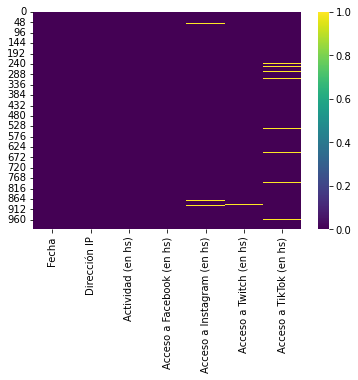

In [99]:
#auxiliar->hago grafico para ver datos nulos:

#inspección de los datos de forma visual
#Grafico para saber donde estan los datos nulos en q columna y en que fila
#->lineas amarillas muestran los datos nulos con respecto a datos totales
sns.heatmap(datoss.isnull(), cmap='viridis') #Aux: (nombre de df.isnull(), cmap:color


#con lo que me deuvelve puedo notar que tiene muy pocos datos nulos->se ve por las pocas rayitas amarillas

In [100]:
#para caracterizarlo estadisticamente:

#muestra para cada columna numerica, cantidad, media, desvio estandar, min, max, los quartiles
datoss.describe()
#viendo media y mediana no podemos asegurar si es o no normal, para esto hay que hacer test de normalidad


,Actividad (en hs),Acceso a Facebook (en hs),Acceso a Instagram (en hs),Acceso a Twitch (en hs),Acceso a TikTok (en hs)
count,1005.000000,1000.000000,990.000000,999.000000,950.000000
mean,9.579622,3.707200,5.946747,5.158248,4.189189
std,5.721012,2.898833,3.962645,3.840922,2.815012
min,-2.060000,0.570000,0.450000,0.010000,0.060000
25%,4.810000,2.027500,2.100000,2.010000,2.162500
50%,8.030000,2.860000,6.385000,3.660000,3.605000
75%,14.000000,5.032500,9.377500,8.085000,5.147500
max,34.450000,37.060000,22.960000,23.680000,19.230000


In [101]:
#me fijo las columnas que me van a importar para trabajar:
#hago lista con nombres de columnas
columnass=list(datoss.columns)
columnass

['Fecha',
 'Dirección IP',
 'Actividad (en hs)',
 'Acceso a Facebook (en hs)',
 'Acceso a Instagram (en hs)',
 'Acceso a Twitch (en hs)',
 'Acceso a TikTok (en hs)']

In [102]:
#tomo solo las columnas que me interesan para hacer el test de normalidad->me interesa solo evaluar la de los datos numericos(excepto la de ID, xq es un indice(1,2,3,4,etc))

#ya se que las primeras 2 columnas no me interesan-> fecha no me sirve y direccion IP tampoco por ende las elimino:
del(columnass[0:2])
columnass




['Actividad (en hs)',
 'Acceso a Facebook (en hs)',
 'Acceso a Instagram (en hs)',
 'Acceso a Twitch (en hs)',
 'Acceso a TikTok (en hs)']

In [103]:

#para ver si es normal o no, hago un test de normalidad->test de shapiro 
#w:valor estadistico, p:valor p-value->si es mayor a 0.05 nuestra distribucion es normal y si es menor a 0.05 no es normal

def verificacion_de_medias(lista):
    test={}
    for columna in lista:
        w, p =stats.shapiro(datoss[columna].dropna()) #Pvalue da 1 si esa columna tiene datos nulos, por eso dentro de esa funcion ademas eliminas los nulos
        test[columna]=p
    return test

verificacion_de_medias(columnass) 


#nos devuelve nros mucho mas chicos que 0.05, por lo tanto no son normales




{'Actividad (en hs)': 6.711347348290036e-20,
 'Acceso a Facebook (en hs)': 5.885453550164232e-44,
 'Acceso a Instagram (en hs)': 6.4553435431768035e-27,
 'Acceso a Twitch (en hs)': 8.659905969376384e-25,
 'Acceso a TikTok (en hs)': 2.721622484232854e-29}

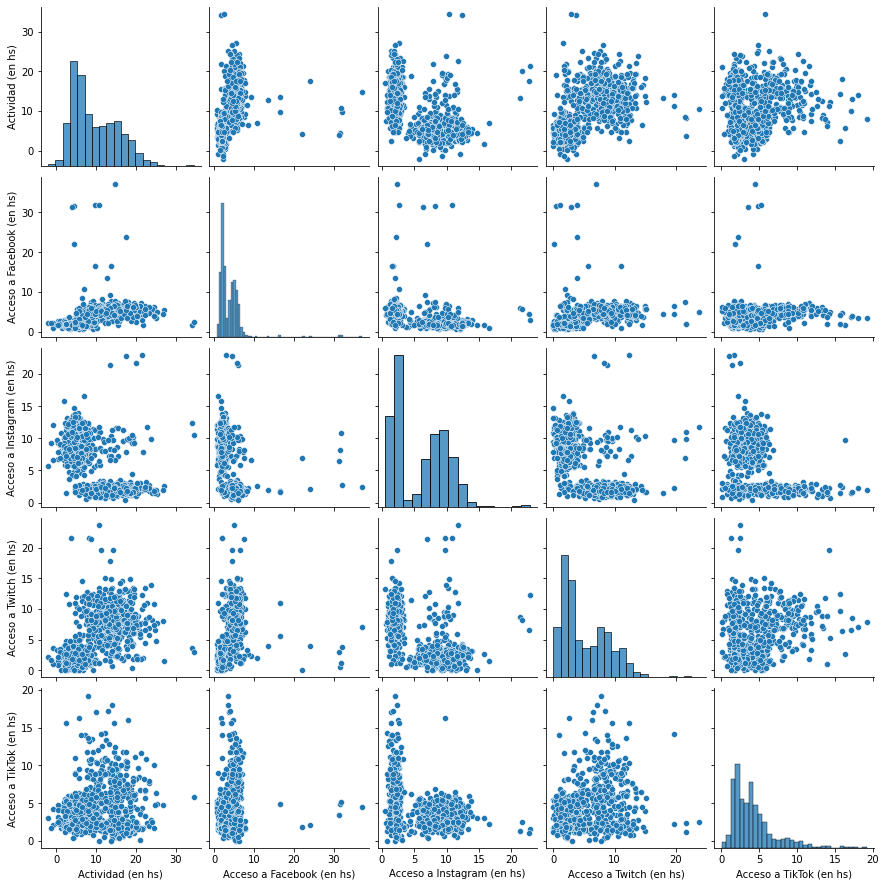

In [104]:
#en diagonal me da los graficos de cada uno
#voy mirando en cada columna cuales serian sus outliers (tambien sirve para inspeccionar y caracterizar este grafico)
#aux: que esto no tenga forma de campana ya es un indicio de que no es normal, pero de todas formas para ver si es normal o no hay q hacer test de normalidad que hicimos anteriormente
sns.pairplot(datoss)

In [ ]:
#el enunciado nos pide elegir 2 columnas y concentrarnos en ellas (queremos que el timepo que utilize en actividad sea en instagram):

#para ello eligo columna de actividad y columna de instagram 

In [ ]:
#voy a limpiar datos de estas columnas que elegi de las anomalias (son 3 las anomalias-> duplicados, nulos y outliers):

In [105]:
#para los outliers: (outliers:son los datos que estan lejos de la curva que representa mi distribucion)
#auxiliar para ver q valor da:
datoss.quantile(0.05).to_dict() #vemos los quantiles->quantil es una forma de separar una distribucion en partes, en este caso seria en n partes)
#si veo distribucion que tiene outliers ya sea al principio o al final o en ambos, los debo eliminar a esos datos que sobran 
#aca estoy tomando el 5% de mi distribucion de todas las columnas que me importa analizar (parte de distribucion que puede estar lejos y no me importaria) 

#(aux:por ej el quartil se separa en 4 partes(25%, 50%, 75% y 100%)

{'Actividad (en hs)': 2.68,
 'Acceso a Facebook (en hs)': 1.38,
 'Acceso a Instagram (en hs)': 1.4244999999999999,
 'Acceso a Twitch (en hs)': 0.83,
 'Acceso a TikTok (en hs)': 1.41}

In [106]:
#para eliminar los outliers hago esto:
#esto lo hago tal cual y con estas mismas proporciones (0.95 y 0.05) para TODAS las columnas numericas -> en este caso solo lo hice para la columna "ingreso"
Cs1=datoss["Actividad (en hs)"].quantile(0.95) #cuantil superior ->muestra 95% de mi distribucion
Ci1=datoss["Acceso a Instagram (en hs)"].quantile(0.05) #cuantil inferior ->muestra el 5% de mi distribucion

Cs2=datoss["Actividad (en hs)"].quantile(0.95) #cuantil superior ->muestra 95% de mi distribucion
Ci2=datoss["Acceso a Instagram (en hs)"].quantile(0.05) #cuantil inferior ->muestra el 5% de mi distribucion
datos1=datoss[(datoss["Actividad (en hs)"]>=Ci1) & (datoss["Actividad (en hs)"]<=Cs1) & (datoss["Acceso a Instagram (en hs)"]>=Ci2) & (datoss["Acceso a Instagram (en hs)"]<=Cs2)]#aca filtro para quedarme solo con los datos que estan entre el cuantil inferior y superior
#filtro en base a estos nros->en mis datos yo quiero que en columna "ingreso" mis datos sean mayores a 5% y menores a 95%
#todos los q estan mas alla o menos los tendremos que borrar

datos1

,Fecha,Dirección IP,Actividad (en hs),Acceso a Facebook (en hs),Acceso a Instagram (en hs),Acceso a Twitch (en hs),Acceso a TikTok (en hs)
0,16/09/20,242.99.117.120,3.36,0.57,8.81,1.95,3.69
1,06/05/20,181174223110,4.28,2.91,9.66,3.45,4.06
2,01/10/21,58.54.184.167,5.62,2.60,6.95,1.94,4.77
3,01/03/17,135.79.184.226,5.83,2.15,7.82,2.03,4.19
4,01/02/21,248.230.40.6,4.59,1.79,11.67,1.46,5.39
...,...,...,...,...,...,...,...
1000,02/04/20,93.205.225.51,5.68,1.95,1.76,10.00,8.40
1001,07/02/19,43.55.114.100,4.62,2.05,2.53,5.55,10.96
1002,25/01/20,147.210.83.222,6.21,1.98,1.58,8.84,14.01
1003,03/07/17,117.69.141.168,4.69,2.41,1.70,9.35,8.83


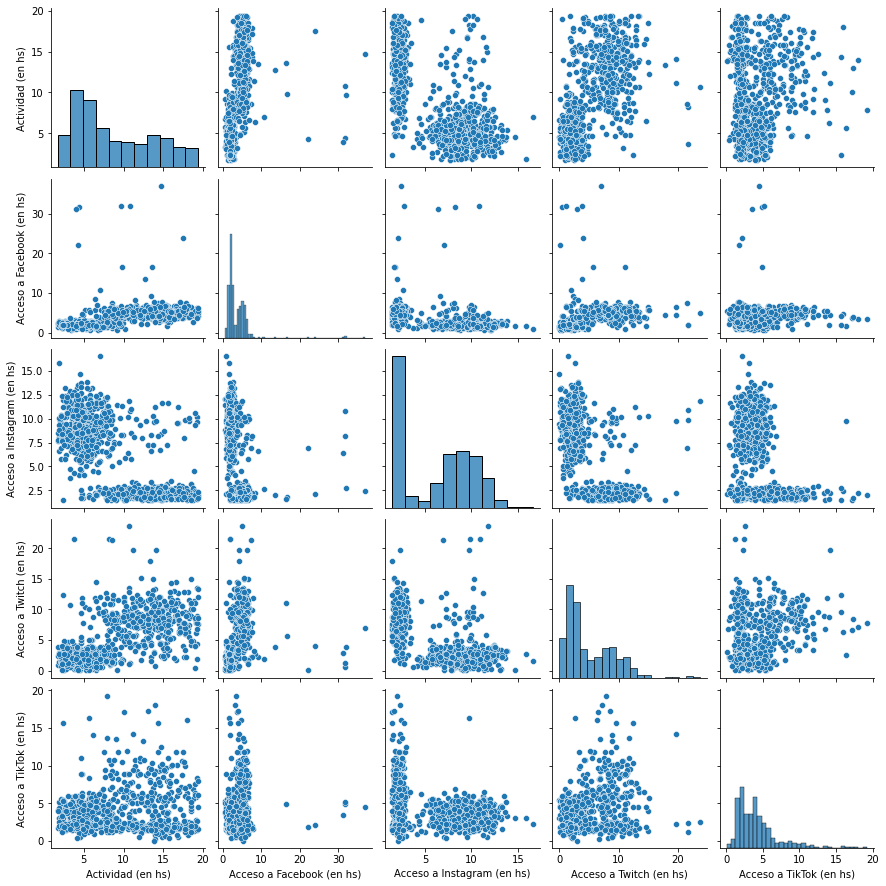

In [117]:
#aca vuelvo a graficar pero ahora con los outliers eliminados de las columnas "actividad" y "instagram"->solo para chequear que pude eliminar los outiliers
sns.pairplot(datos1)

In [127]:
#ahora a ese df que me quedo con los datos que no tienen outliers, ya guardado en una nueva variable "datos1"
#le voy a eliminar los datos duplicados :
datos2=datos1.drop_duplicates().reset_index(drop=True) #reseteo indices para que quede mas prolijo
datos2

,Fecha,Dirección IP,Actividad (en hs),Acceso a Facebook (en hs),Acceso a Instagram (en hs),Acceso a Twitch (en hs),Acceso a TikTok (en hs)
0,16/09/20,242.99.117.120,3.36,0.57,8.81,1.95,3.69
1,06/05/20,181174223110,4.28,2.91,9.66,3.45,4.06
2,01/10/21,58.54.184.167,5.62,2.60,6.95,1.94,4.77
3,01/03/17,135.79.184.226,5.83,2.15,7.82,2.03,4.19
4,01/02/21,248.230.40.6,4.59,1.79,11.67,1.46,5.39
...,...,...,...,...,...,...,...
871,02/04/20,93.205.225.51,5.68,1.95,1.76,10.00,8.40
872,07/02/19,43.55.114.100,4.62,2.05,2.53,5.55,10.96
873,25/01/20,147.210.83.222,6.21,1.98,1.58,8.84,14.01
874,03/07/17,117.69.141.168,4.69,2.41,1.70,9.35,8.83


In [ ]:
#en cuanto a la limpieza de datos nulos:

#para eliminar los datos nulos:
##datos3 = datos2.dropna()
#si son relativamente pocos los datos nulos los puedo eliminar con el dropna()->elimina nulos y en la fila donde hay un dato nulo->me borra toda esa fila
##datos3 =dato2.fillna().mean()
#si son muchos los datos nulos los elimina con el fillna().mean()->elimina los nulos y los valores restantes de esa fila los reemplaza por la media de esa columna

#aux:
#es lo mismo que hacer esto:
##datos.dropna(inplace=True) #inplace=True:para que se eliminen los duplicados en la misma lista
##datos.fillna(datos.mean(), inplace=True) #inplace=True:para que se eliminen los duplicados en la misma lista

#aux:si quisieras borrar solo datos nulos deuna columna en particular:
##datos_sin_nulos_de_ingreso=datos["Ingreso"].dropna() ->pero en este ej no sirve hacer esto (dado que yo necesito ver la comparacion de todo con todo, no podes comparar nro contra nada)
##datos_sin_nulos_de_ingreso=datos.fillna(datos["Ingreso"].mean())


In [128]:
##aux:en este caso pocentaje de datos nulos, es bajo en general, por lo que vimos en el grafico y cuando inspeccionamos el df por ende los elimino con el dropna() borrando ademas la fila donde hay un dato nulo
datos3 = datos2.dropna().reset_index(drop=True) #reseteo indices para que quede mas prolijo
datos3

,Fecha,Dirección IP,Actividad (en hs),Acceso a Facebook (en hs),Acceso a Instagram (en hs),Acceso a Twitch (en hs),Acceso a TikTok (en hs)
0,16/09/20,242.99.117.120,3.36,0.57,8.81,1.95,3.69
1,06/05/20,181174223110,4.28,2.91,9.66,3.45,4.06
2,01/10/21,58.54.184.167,5.62,2.60,6.95,1.94,4.77
3,01/03/17,135.79.184.226,5.83,2.15,7.82,2.03,4.19
4,01/02/21,248.230.40.6,4.59,1.79,11.67,1.46,5.39
...,...,...,...,...,...,...,...
814,02/04/20,93.205.225.51,5.68,1.95,1.76,10.00,8.40
815,07/02/19,43.55.114.100,4.62,2.05,2.53,5.55,10.96
816,25/01/20,147.210.83.222,6.21,1.98,1.58,8.84,14.01
817,03/07/17,117.69.141.168,4.69,2.41,1.70,9.35,8.83


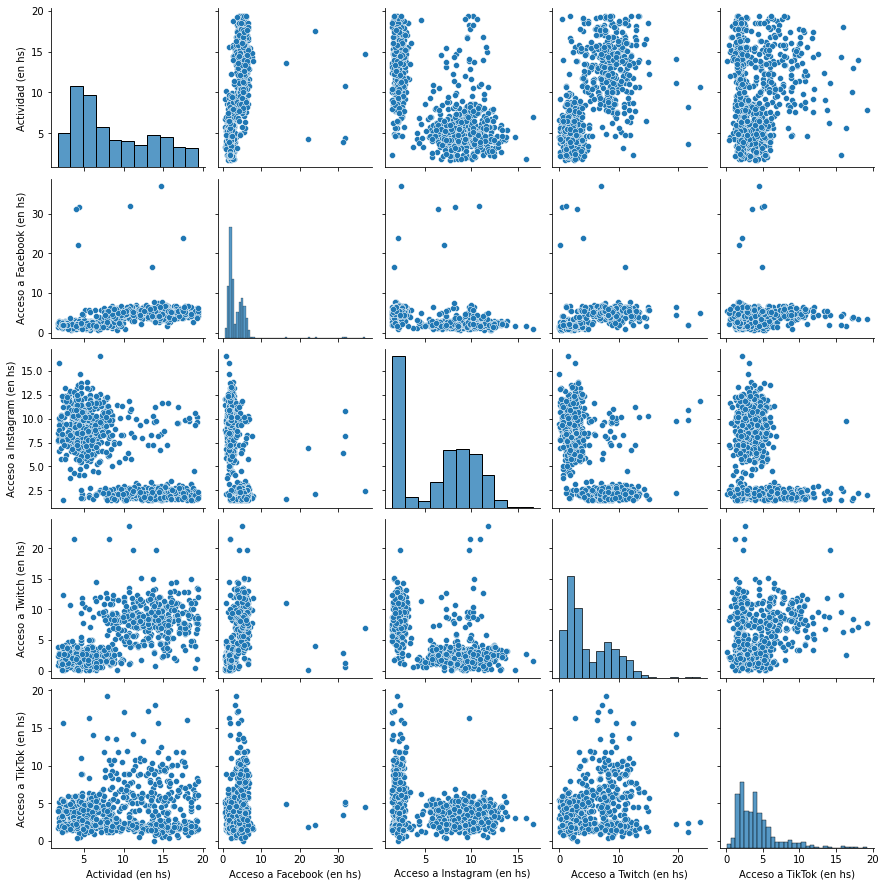

In [129]:
#grafico con las 3 anomalias ya limpiadas
sns.pairplot(datos3)

In [130]:
#escalo y normalizo
scaler=StandardScaler() #instancio el objeto
datos_escaleado=scaler.fit_transform(datos3[columnass])
datos_escaleado

array([[-1.10687811, -1.03164623,  0.65867466, -0.77637467, -0.15665751],
       [-0.91761889, -0.20899236,  0.88455019, -0.38616083, -0.02136746],
       [-0.64195871, -0.31797642,  0.16440585, -0.7789761 ,  0.23824317],
       ...,
       [-0.52058595, -0.53594454, -1.26259603,  1.01600758,  3.61683781],
       [-0.8332751 , -0.3847731 , -1.23070772,  1.14868029,  1.72277717],
       [-0.46092815, -0.66250667, -1.15630167,  2.49621876,  0.12489205]])

In [132]:
def inercias_por_k(df_escalado):
  inercias = {}
  for i in range(1,11):
      kmeans = KMeans(n_clusters = i, init="random", n_init=10, max_iter=300, random_state=123457)
      kmeans.fit(df_escalado)
      inercias[i] = kmeans.inertia_
  return inercias

In [133]:
inercias =inercias_por_k(datos_escaleado)

In [134]:
inercias

{1: 4094.9999999999995,
 2: 2135.184261042165,
 3: 1665.8923595341757,
 4: 1202.7035673857881,
 5: 1080.1622737279586,
 6: 976.4112364277939,
 7: 885.8507778703301,
 8: 823.977439495902,
 9: 781.9642073646171,
 10: 735.9489086165322}

In [135]:
#hago grafico del codo
df_inercias=pd.DataFrame(inercias.items(), columns=["K", "inercia"])

<AxesSubplot:xlabel='K', ylabel='inercia'>

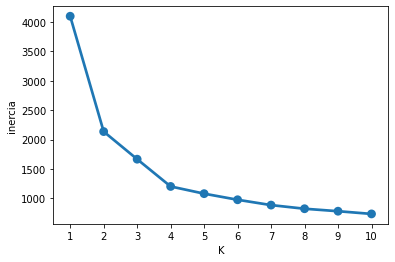

In [136]:
sns.pointplot(data= df_inercias, x="K", y="inercia")


analizo la devolucion del grafico del codo-> Me fijo donde quiebra q es en K=2 y K=4 
Luego a partir del grafico del silhouette me dijo que grupo es mejor

hago 1ro graficos con k=2 que es el 1ro que me aparece:

los grupos:
se arman en base a ver si se correlacionan 2 valores ej aux:(uso poco instagram mucho internet)

In [144]:
k=2
kmeans = KMeans(n_clusters= k, init="random", n_init=10, max_iter=300, random_state=1234567)
kmeans.fit(datos_escaleado)

KMeans(init='random', n_clusters=2, random_state=1234567)

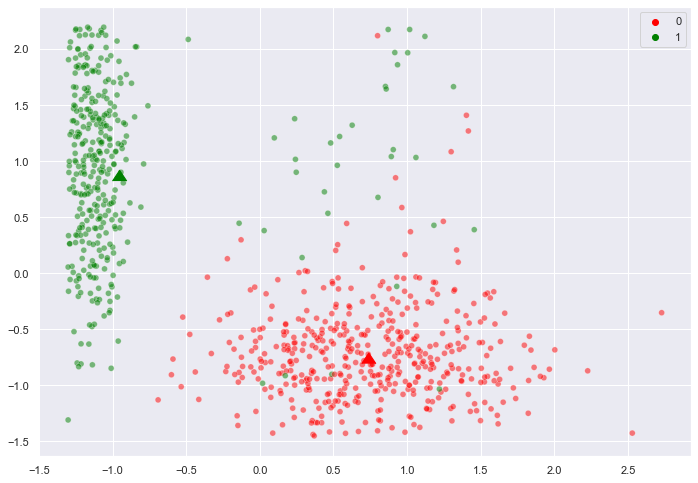

In [146]:
#este es otro grafico #aux:si es para 

#grafica 2 colores añ ser k=2 y hue=[0, 1 ] al ser k=2 
#Grafica [:,0] toda la columna 0 que es actividad y [:,2] toda la columna 2 que es instagram

colores = ["red", "green"]#Colores
g=sns.set(rc={"figure.figsize":(11.7,8.27)}) #Tamaño (esto lo agrego guille)
g = sns.scatterplot(x = datos_escaleado[:,2], y = datos_escaleado[:, 0], hue = kmeans.labels_, palette = colores, alpha = 0.5) #grafica puntos
g = sns.scatterplot(x = kmeans.cluster_centers_[:,2], y = kmeans.cluster_centers_[:,0], zorder = 10, palette = colores, hue = [0, 1], legend = False, marker=6, s=200) #Pone centroides en el gráfico (traingulos que muestran las distancias)
                                                        

In [138]:
silhouette_avg=silhouette_score(datos_escaleado, kmeans.labels_)
sample_silhouette_values= silhouette_samples(datos_escaleado, kmeans.labels_)

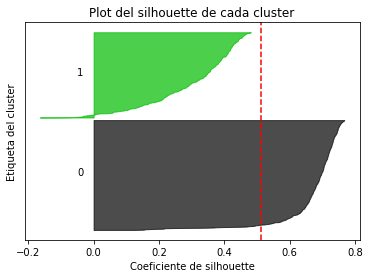

In [140]:
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])

graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

el grupo 0 esta bien y el grupo 1 esta mal, algunos datos tienden a -1 y se queda muy lejos de 1

In [141]:
k=4
kmeans = KMeans(n_clusters= k, init="random", n_init=10, max_iter=300, random_state=1234567)
kmeans.fit(datos_escaleado)

KMeans(init='random', n_clusters=4, random_state=1234567)

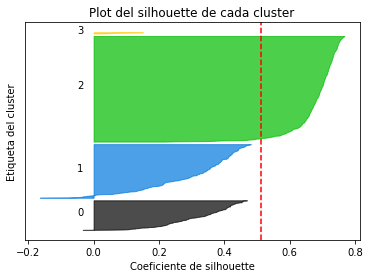

In [142]:
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])

graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

cuando hago con k=4 es peor todaviaaa el grafico(el menos peor es con k=2)